## Clean Data

In [15]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # No limits of columns to display

data = pd.read_csv('data/output.csv')
print(data.shape)

(20411, 6)


In [ ]:
data.columns

Index(['mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')

In [21]:
data.isna().sum()

mos            0
throughput     0
avg_bitrate    0
delay_qos      0
jitter         0
packet_loss    0
dtype: int64

array([[<Axes: title={'center': 'mos'}>,
        <Axes: title={'center': 'throughput'}>],
       [<Axes: title={'center': 'avg_bitrate'}>,
        <Axes: title={'center': 'delay_qos'}>],
       [<Axes: title={'center': 'jitter'}>,
        <Axes: title={'center': 'packet_loss'}>]], dtype=object)

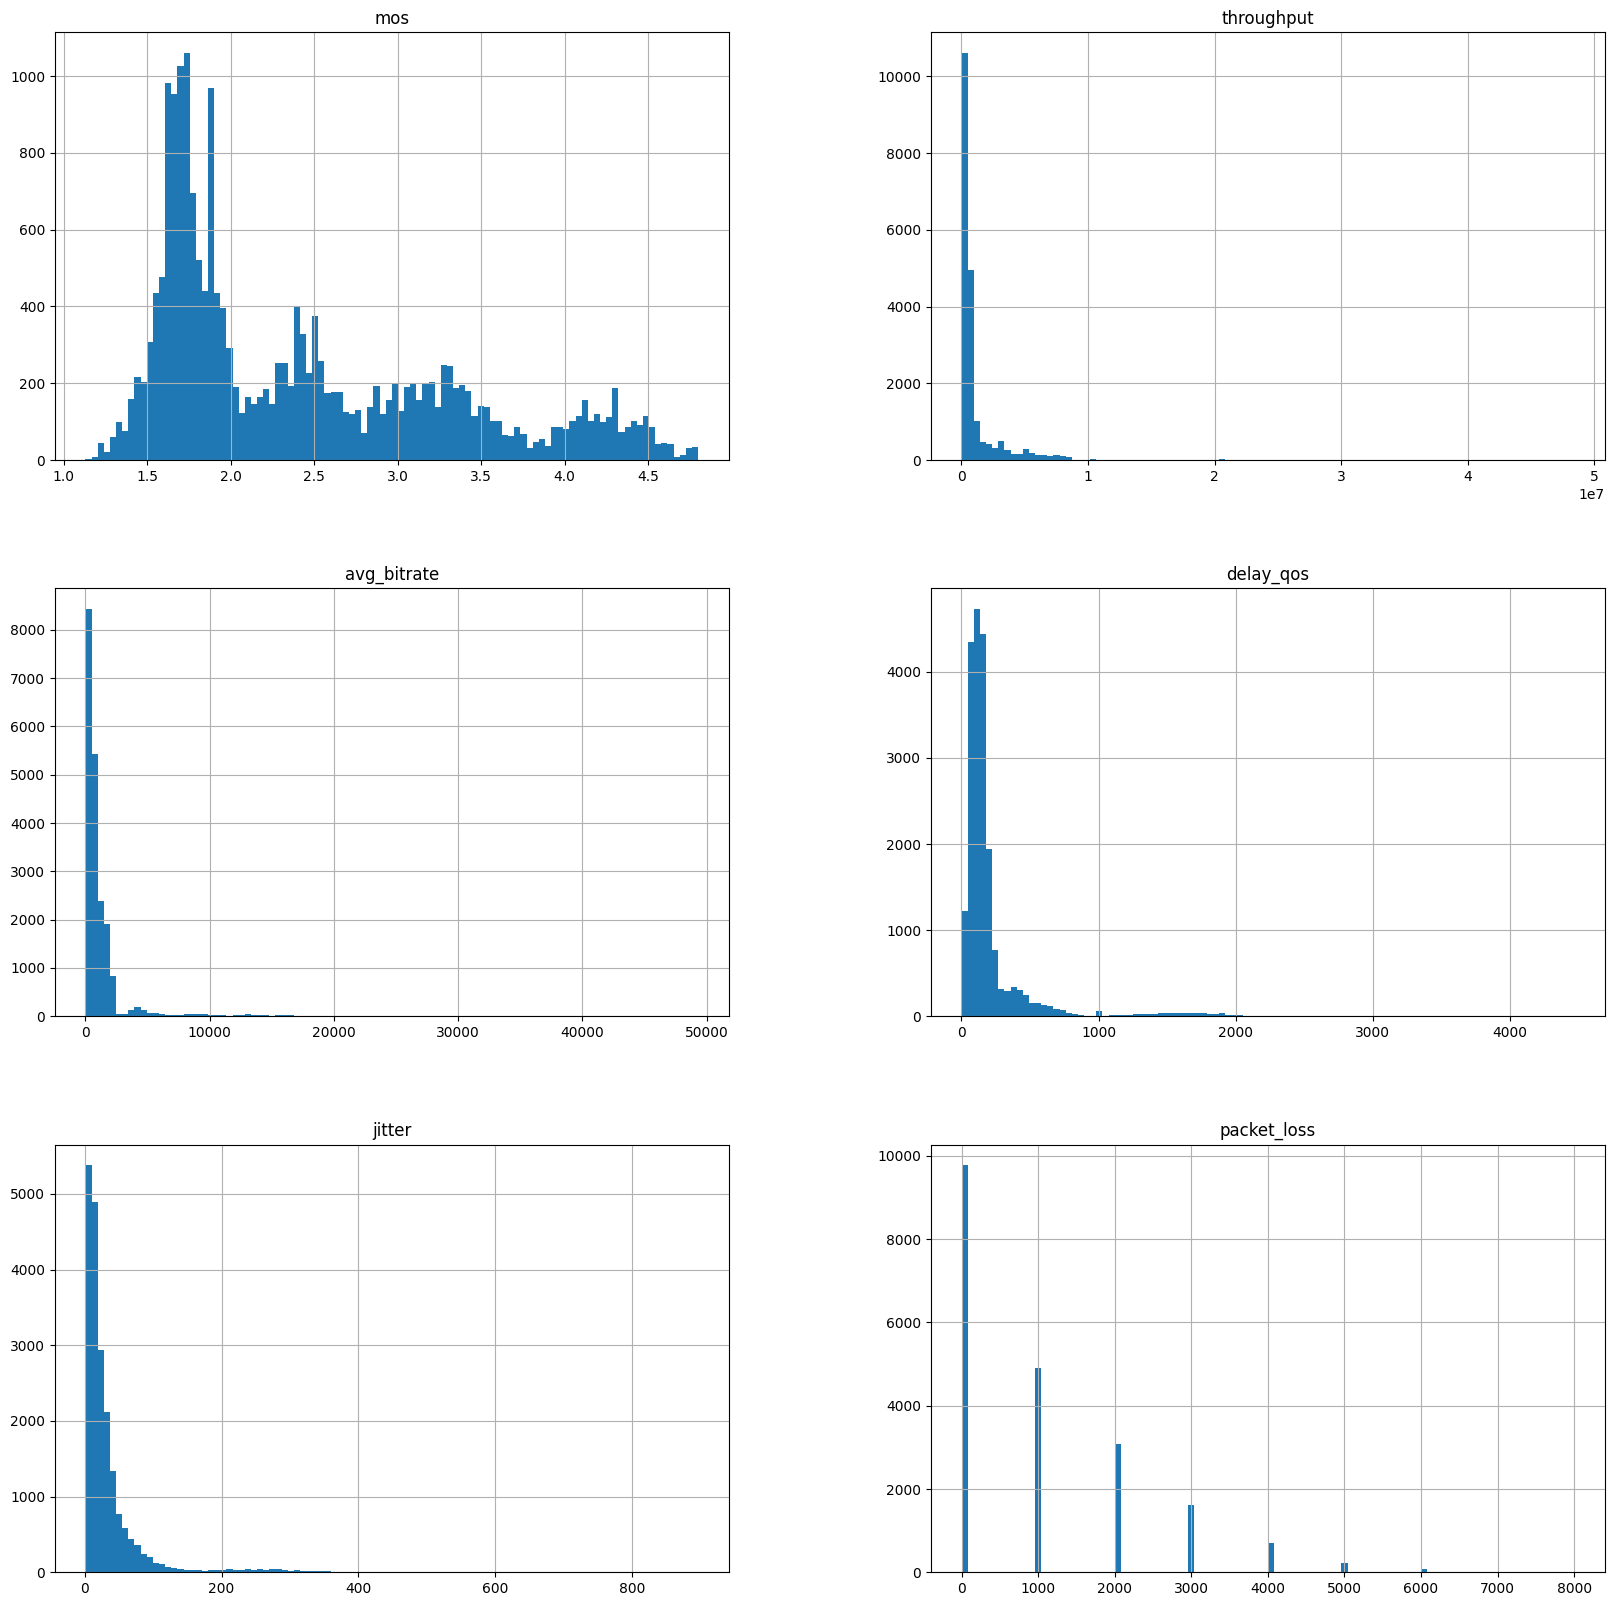

In [26]:
data.hist(bins=100, figsize=(20,20))

In [31]:
data[data['mos'] > 4.5]

,mos,throughput,avg_bitrate,delay_qos,jitter,packet_loss
4926,4.72,379134,2270,141,20,0
4933,4.63,296202,2230,119,19,0
4934,4.63,647163,2220,158,19,0
4938,4.54,460795,2160,133,16,1000
5138,4.79,143542,13750,12,3,0
...,...,...,...,...,...,...
19214,4.59,735006,1320,113,23,2000
19510,4.51,189269,1070,139,33,1000
19533,4.59,47065,540,415,133,0
20332,4.53,4839795,12040,58,2,2000


In [32]:
data.columns

Index(['mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')

In [34]:
X_data = data[['throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss']]

Y_data = data[['mos']]

In [35]:
X_data

,throughput,avg_bitrate,delay_qos,jitter,packet_loss
0,238472,660,195,18,1000
1,70946,300,181,23,0
2,316053,460,176,14,1000
3,160097,290,152,24,0
4,204129,770,104,26,0
...,...,...,...,...,...
20406,7503560,1990,56,10,0
20407,7445048,2110,59,4,1000
20408,3020039,1420,58,2,2000
20409,5288418,13120,60,9,1000


In [36]:
Y_data

,mos
0,1.96
1,1.80
2,2.25
3,1.88
4,3.51
...,...
20406,1.64
20407,1.64
20408,1.76
20409,2.89


## Train model

### Split into train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

/home/tutit/miniconda3/envs/qoe_predict/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred = model.predict(X_test)
y_pred

array([2.8607, 1.5792, 1.886 , ..., 1.7865, 1.7417, 1.4926], shape=(6124,))

In [44]:
model.score(X_test, Y_test)

0.6897464156062518